In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")b

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1588621913530_0004,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
review=spark.read.json('s3://sta9760-laura-spark-datasets/yelp-dataset/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
print(f'Total Columns: {len(review.dtypes)}')
print(f'Total Rows: {review.count():,}')
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,021,122
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [5]:
review.createOrReplaceTempView('YelpReview')

review_sqldf = spark.sql(
'''
SELECT `business_id`, `stars`
FROM YelpReview

'''
)
review_sqldf.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

In [6]:
review_avg=review_sqldf.groupby('business_id').agg({'stars':'mean'})
review_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|OGQ_6nIn4QQL2U6t0...|4.5394736842105265|
|iOhHDavGdswJQlPW5...|2.0508474576271185|
|4_dAc707J3-ENanMd...|               3.1|
|OyhCNhJJuJjUt2avx...|2.8954468802698146|
|RSOinkOUpxm0mGw1I...| 4.309338521400778|
+--------------------+------------------+
only showing top 5 rows

In [7]:
business=spark.read.json('s3://sta9760-laura-spark-datasets/yelp-dataset/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
print(f'Total Columns: {len(business.dtypes)}')
print(f'Total Rows: {business.count():,}')
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

In [10]:
business_rating =review_avg.join(business, on="business_id", how="inner").select('avg(stars)','stars', 'name', 'city', 'state')
business_rating.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+
|        avg(stars)|stars|                name|       city|state|
+------------------+-----+--------------------+-----------+-----+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|
+------------------+-----+--------------------+-----------+-----+
only showing top 5 rows

In [14]:
import pyspark.sql.functions as F
review_skew = business_rating.withColumn("skewpoint", F.round((F.col('avg(stars)')-F.col('stars'))/F.col('stars'), 3))
review_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+-----------+-----+---------+
|        avg(stars)|stars|                name|       city|state|skewpoint|
+------------------+-----+--------------------+-----------+-----+---------+
|  4.11784140969163|  4.0|Delmonico Steakhouse|  Las Vegas|   NV|    0.029|
|2.3333333333333335|  2.5|Neo-Paws Internat...|    Toronto|   ON|   -0.067|
|             4.375|  4.5| McFarling Law Group|  Las Vegas|   NV|   -0.028|
|3.3333333333333335|  3.5|Volvo of Mississauga|Mississauga|   ON|   -0.048|
|               5.0|  5.0|Andre Agassi Coll...|  Las Vegas|   NV|      0.0|
+------------------+-----+--------------------+-----------+-----+---------+
only showing top 5 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

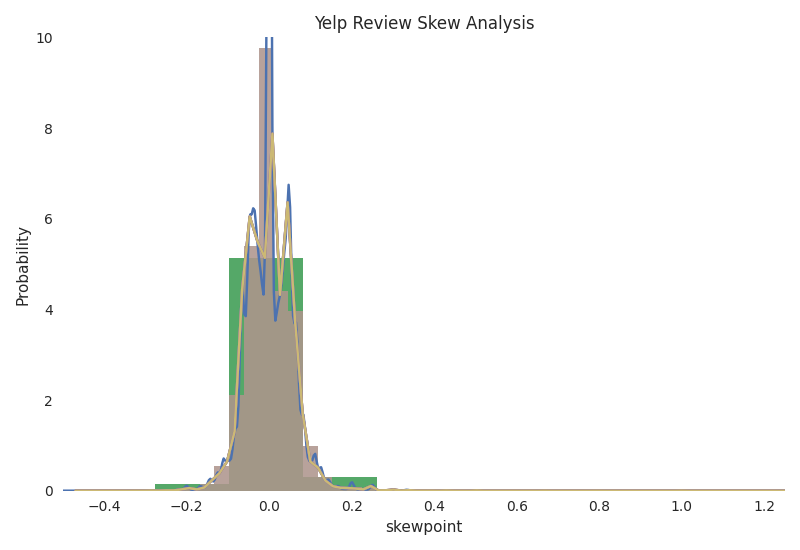

In [25]:
result_pdf = review_skew.toPandas()
sns.distplot(result_pdf['skewpoint'])    
plt.title('Yelp Review Skew Analysis')
plt.tight_layout()
plt.box(False)
plt.xlim(-0.5, 1.25)
plt.ylim(0, 10)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

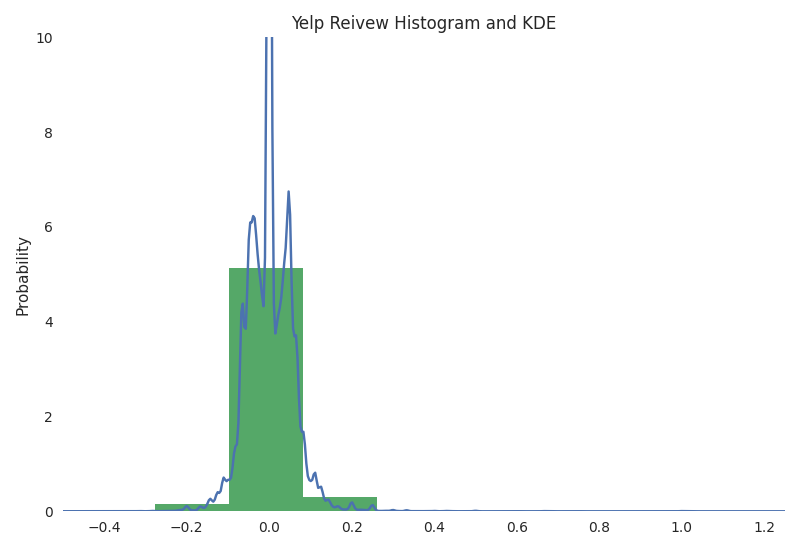

In [26]:

result_pdf = review_skew.toPandas()
fig, ax = plt.subplots()
result_pdf['skewpoint'].plot.kde(ax=ax, legend=False, title='Yelp Reivew Histogram and KDE')
result_pdf['skewpoint'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
plt.style.use('seaborn')
plt.tight_layout()
#plt.legend('')
plt.box(False)
plt.xlim(-0.5, 1.25)
plt.ylim(0, 10)
%matplot plt


## Do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph.

A: Most skew poit is close to 0. So Yelp reviews are not negative. We need also plot review amount vs review point.


In [29]:
review.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------------------------+------------------+--------------------+
|summary|         business_id|              cool|               date|             funny|           review_id|             stars|                                 text|            useful|             user_id|
+-------+--------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------------------------+------------------+--------------------+
|  count|             8021122|           8021122|            8021122|           8021122|             8021122|           8021122|                              8021122|           8021122|             8021122|
|   mean|                null|0.5745620126461111|               null|0.4596423044057926|                null|3.7035746370644906|                                 null|1.3228

## Top Rated Business

In [33]:
review.createOrReplaceTempView('YelpReview')
top_rated = spark.sql(
'''
SELECT business_id, count(*) as reviews
FROM YelpReview
WHERE stars=5
GROUP by business_id
ORDER by 2 desc

'''
)
top_rated .show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+
|         business_id|reviews|
+--------------------+-------+
|4JNXUYY8wbaaDmk3B...|   4501|
|RESDUcs7fIiihp38-...|   4247|
|faPVqws-x-5k2CQKD...|   3415|
|vHz2RLtfUMVRPFmd7...|   3290|
|JDZ6_yycNQFTpUZzL...|   3158|
|f4x1YBxkLrZg652xt...|   2848|
|QXV3L_QFGj8r6nWX2...|   2827|
|3kdSl5mo9dWC4clrQ...|   2758|
|DkYS3arLOhA8si5uU...|   2738|
|mDR12Hafvr84ctpsV...|   2661|
+--------------------+-------+
only showing top 10 rows

In [54]:
stars_reviews = spark.sql(
'''
SELECT stars, count(*) as reviews
FROM YelpReview
GROUP by stars

'''
)
stars_reviews.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|stars|reviews|
+-----+-------+
|  1.0|1283897|
|  4.0|1673404|
|  3.0| 842289|
|  2.0| 635072|
|  5.0|3586460|
+-----+-------+

Create Correlation Matrix between stars and reviews

In [60]:
corrMatrix = stars_reviews.toPandas().corr()
print(corrMatrix)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            stars   reviews
stars    1.000000  0.757088
reviews  0.757088  1.000000

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

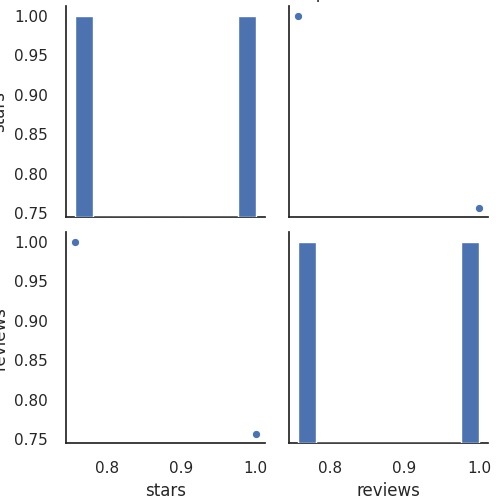

In [70]:
sns.set(style="white")
sns.pairplot(corrMatrix)
plt.title('Yelp Stars and Reviews')
%matplot plt

## Conclusion: 
We see high correlation beween number of reviews and number of stars. People are only bothering to rate good firms that makes it interesting to use Yelp only to determine if the firm is reviewd at all. If the firm is not rated the unwritten reviews are bad. 

## Correlation Business and rating

In [72]:
business_rating = spark.sql(
'''
SELECT business_id, avg(stars) as rating
FROM YelpReview
GROUP by business_id
ORDER by 2 desc

'''
)
business_rating.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------+
|         business_id|rating|
+--------------------+------+
|SRq4TMgYktPBfn3to...|   5.0|
|8kjDJcXdvjuaKVQbb...|   5.0|
|S20j1b8PTVUESUAaX...|   5.0|
|mVariaY2pINzKVC4S...|   5.0|
|8hW_-VGGJ8ryhkQKP...|   5.0|
|GB97RrUNQ3mXOhMdy...|   5.0|
|Ty6Cw-cqTJ-87lVqt...|   5.0|
|URQRnIgdbTKZITKEa...|   5.0|
|_6nuapvg518IjkN5t...|   5.0|
|TAHyy4pvdoiR5_YLx...|   5.0|
+--------------------+------+
only showing top 10 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

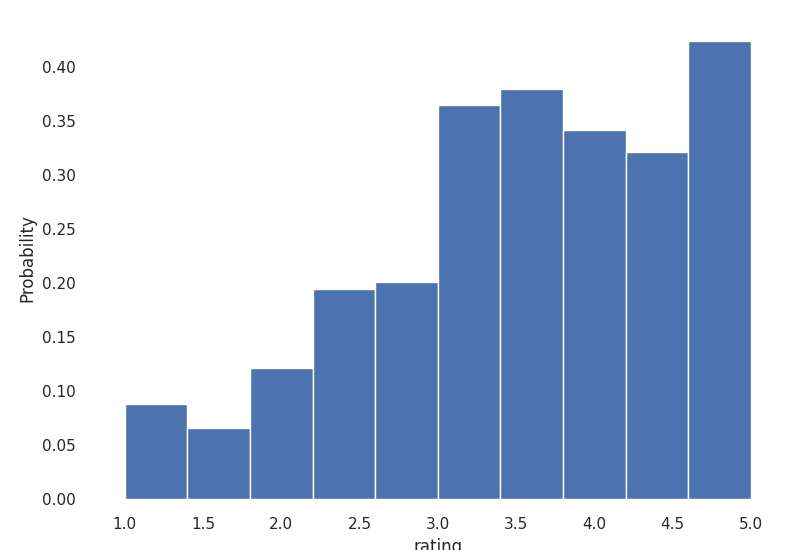

In [75]:
rating_pdf = business_rating.toPandas()
fig, ax = plt.subplots()
rating_pdf['rating'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
plt.tight_layout()
#plt.legend('')
plt.xlabel('rating')
plt.box(False)
%matplot plt
